# Task 1 - Plots
## WordCloud

In [87]:
import csv
import matplotlib.pyplot as plt
import operator

from wordcloud import WordCloud

In [66]:
def get_frequency_N_rows(N=50, filename='ordered_500_part-r-00000.csv'):
    # Get N rows from file
    rows = []
    with open(filename, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')

        i = 0
        for row in spamreader:
            rows.append((row[0],row[1]))
            i += 1
            if (i == N): break  
                
    # Create a dictionary of frequencies
    freq_dict = {}
    for (tag,freq) in rows:
        freq_dict[tag[1:]] = float(freq)
    return freq_dict

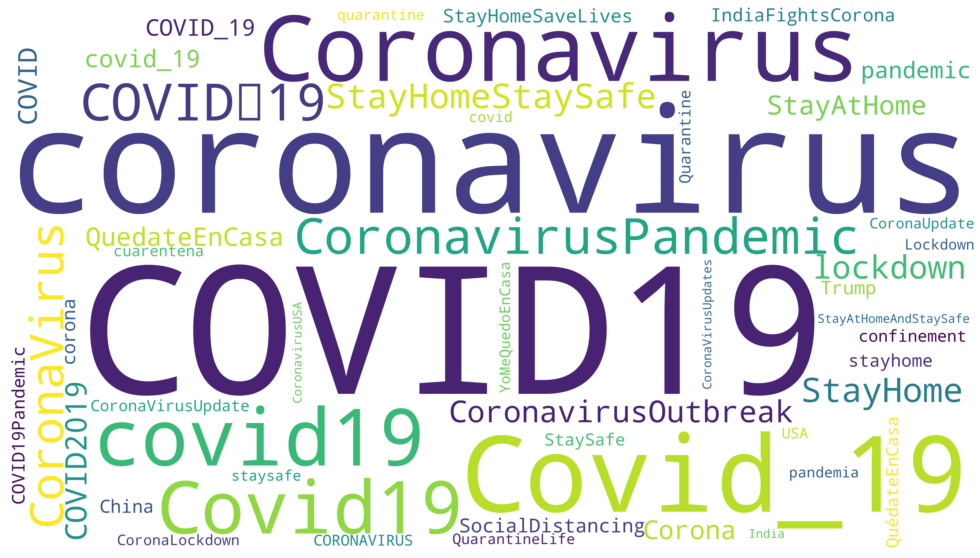

In [115]:
# Generate wordcloud
wordcloud = WordCloud(background_color="white",width=1600,height=900,scale=4).generate_from_frequencies(get_frequency_N_rows())
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud_50.png', bbox_inches='tight')

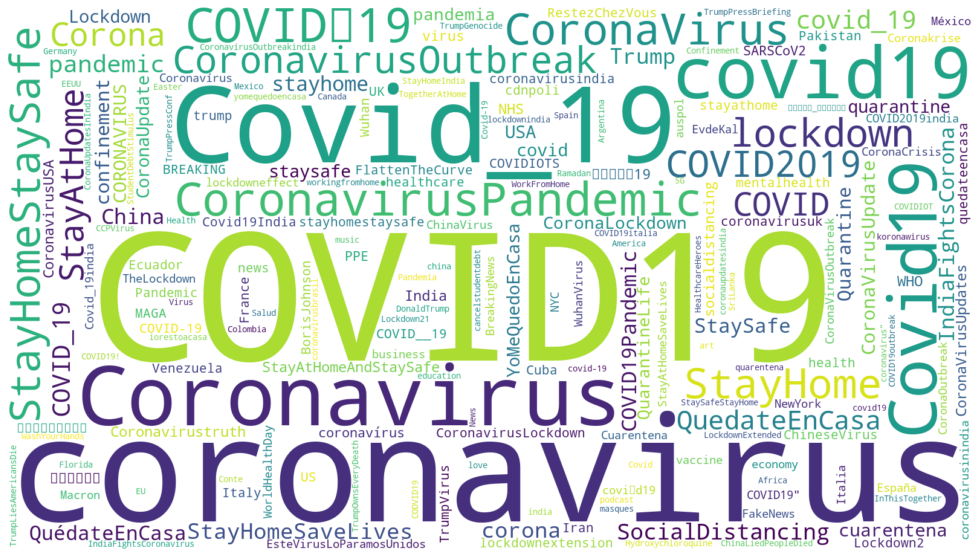

In [114]:
# Generate wordcloud (with all 500)
wordcloud = WordCloud(background_color="white",width=1600,height=900).generate_from_frequencies(get_frequency_N_rows(500))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud_500.png', bbox_inches='tight')

## Degree Histogram

In [90]:
def get_degrees_N_rows(N=50, filename='ordered_500_part-r-00000.csv'):
    # Get N rows from file
    rows = []
    with open(filename, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')

        i = 0
        for row in spamreader:
            degree = len(row[2].split(' '))
            rows.append((row[0],degree))
            i += 1
            if (i == N): break  
                
    # Create a dictionary of degrees
    deg_dict = {}
    for (tag,deg) in rows:
        deg_dict[tag[1:]] = int(deg)
    return deg_dict

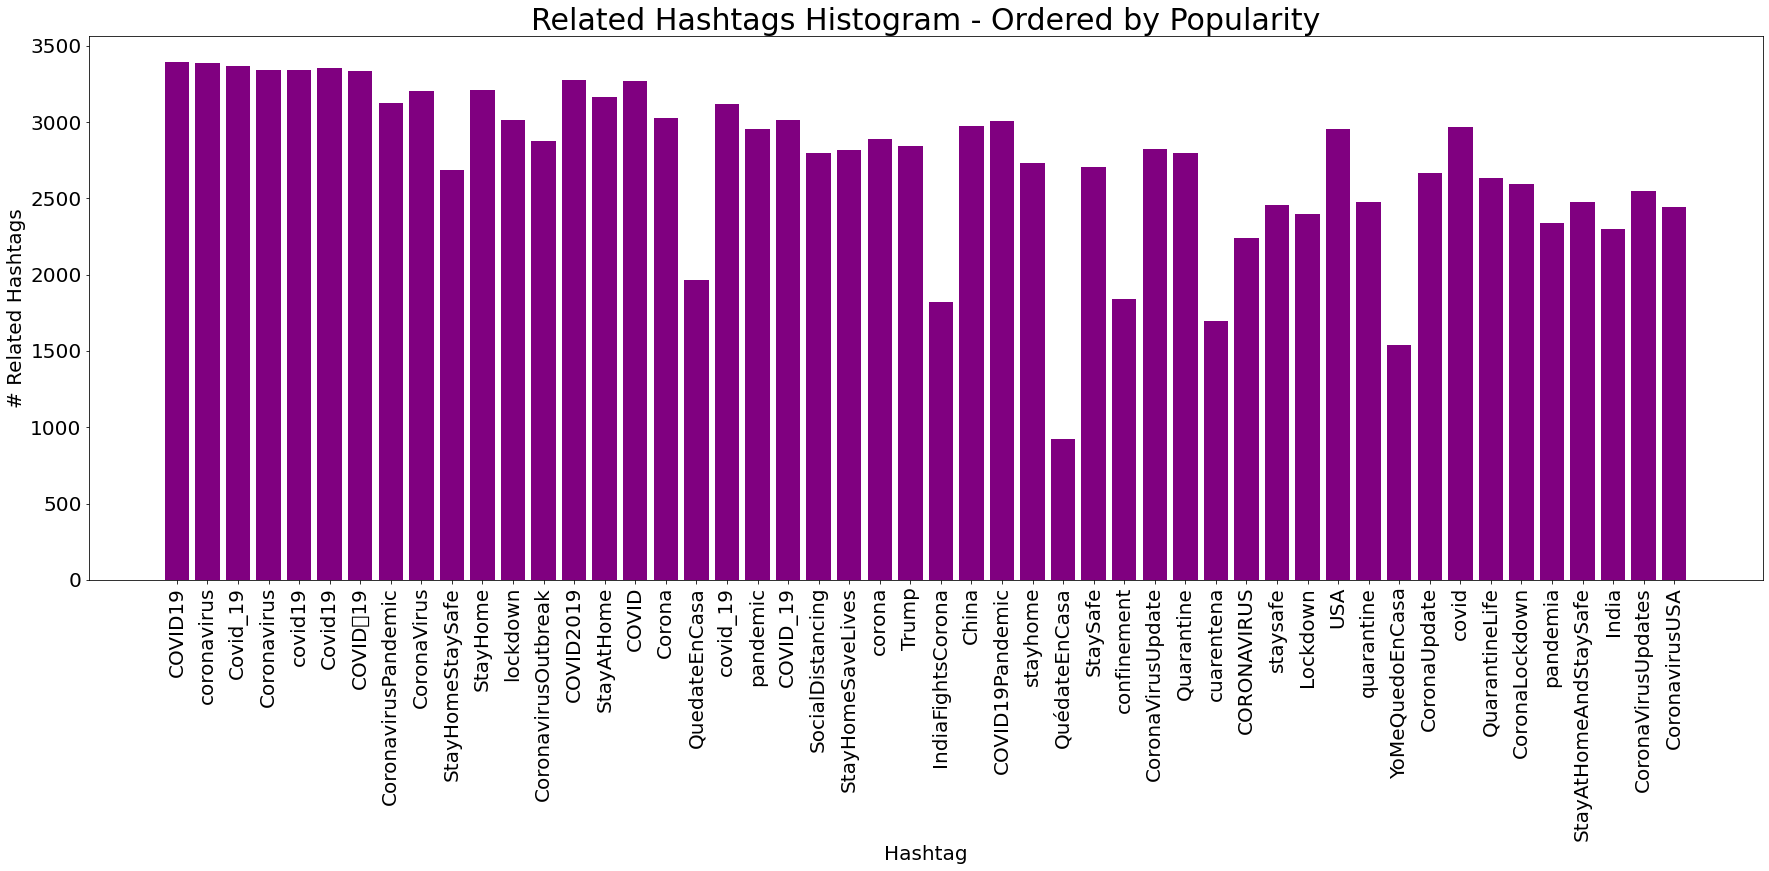

In [120]:
plt.figure(figsize=(30,10))
# plt.rcParams['font.size'] = '20'
plt.title("Related Hashtags Histogram - Ordered by Popularity", fontsize=30)
plt.ylabel("# Related Hashtags")
plt.yticks(fontsize=20)
plt.xlabel("Hashtag")
plt.xticks(fontsize=20, rotation=90)
plt.bar(deg_dict.keys(), deg_dict.values(), color='purple')
plt.savefig('related_hashtags_ord_popularity.png', bbox_inches='tight')

In [110]:
# Sort it by degree
deg_dict_sorted = dict(sorted(deg_dict.items(), key=operator.itemgetter(1),reverse=True))

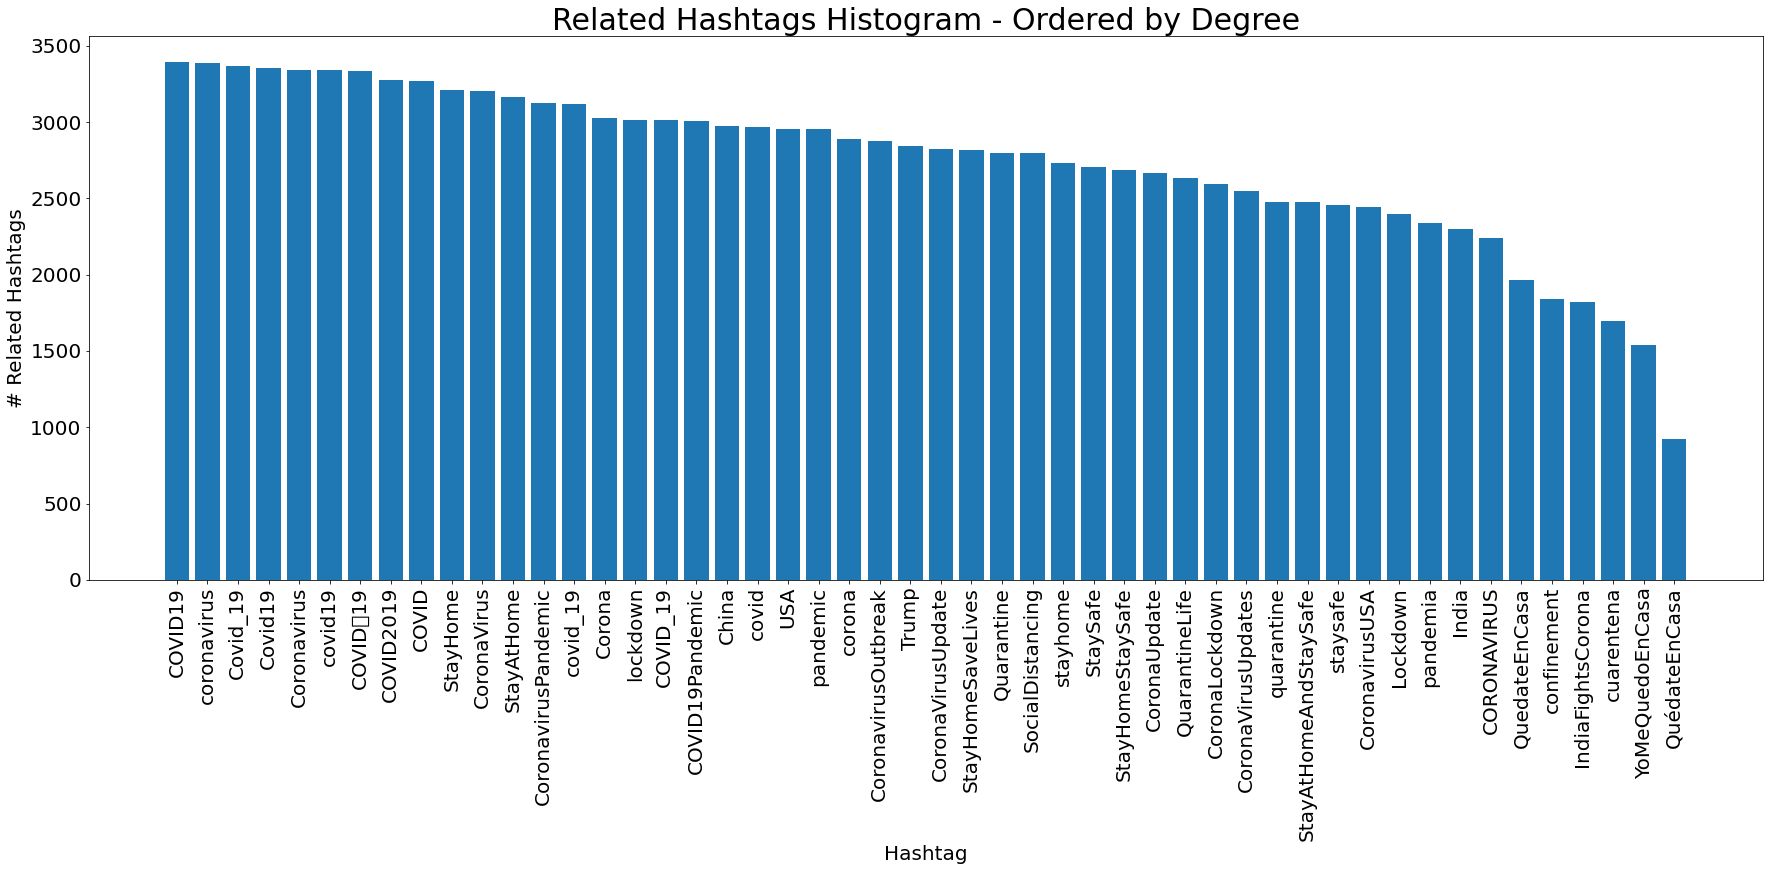

In [121]:
plt.figure(figsize=(30,10))
# plt.rcParams['font.size'] = '20'
plt.title("Related Hashtags Histogram - Ordered by Degree", fontsize=30)
plt.ylabel("# Related Hashtags")
plt.yticks(fontsize=20)
plt.xlabel("Hashtag")
plt.xticks(fontsize=20, rotation=90)
plt.bar(deg_dict_sorted.keys(), deg_dict_sorted.values())
plt.savefig('related_hashtags_ord_by_degree.png', bbox_inches='tight')